In [1]:
from backtester import *
import sqlite3 as sql

AAPL.us m15


  0%|          | 0/9800 [00:00<?, ?it/s]

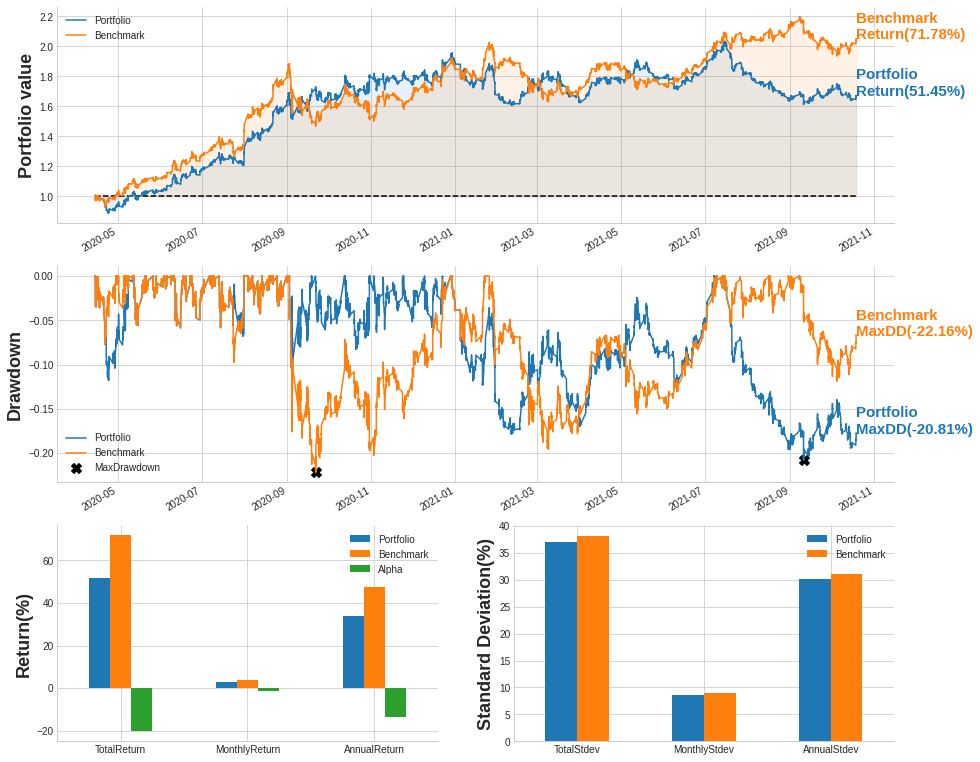

----------------------------------------------------------------------
Data length: |552 days 03:30:00|
Data range from |2020-04-14 16:15:00| to |2021-10-18 19:45:00|
----------------------------------------------------------------------
***** Portfolio Returns in percentage(%) *****
╒═══════════════╤═════════════╤═════════════╤═════════╕
│               │   Portfolio │   Benchmark │   Alpha │
╞═══════════════╪═════════════╪═════════════╪═════════╡
│ TotalReturn   │      51.458 │      71.782 │ -20.325 │
├───────────────┼─────────────┼─────────────┼─────────┤
│ MonthlyReturn │       2.796 │       3.900 │  -1.104 │
├───────────────┼─────────────┼─────────────┼─────────┤
│ AnnualReturn  │      34.017 │      47.452 │ -13.436 │
╘═══════════════╧═════════════╧═════════════╧═════════╛
***** Portfolio Standard Deviation in percentage(%) *****
╒══════════════╤═════════════╤═════════════╕
│              │   Portfolio │   Benchmark │
╞══════════════╪═════════════╪═════════════╡
│ TotalStdev   │  

In [2]:
ticker = 'AAPL.us'
freq = 'm15'
print(ticker, freq)
conn = sql.connect(f'PriceData/PriceData_{freq}.db')
data = pd.read_sql(f"SELECT * FROM '{ticker}'", conn, parse_dates=['date'], index_col=['date'])
conn.close()

periods = (50, 200)
backtest = EMABacktester(data, freq, periods)
backtest.backtest()
backtest.results()